In [1]:
import pandas as pd
import numpy as np
import threadpoolctl
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# READING IN FILES 
df = pd.read_csv("/Users/kira1/Documents/134 Final Project/data/audio_features.csv")
scraped_1 = pd.read_csv("/Users/kira1/Documents/134 Final Project/data/scraped_data1.csv")
scraped_1 = scraped_1.rename(columns={'None': 'artist', 'None.1': 'title', 'GBKQU1524393': 'isrc'})
scraped_1 = scraped_1.drop('True', axis=1)
scraped_2 = pd.read_csv("/Users/kira1/Documents/134 Final Project/data/scraped_data2.csv")
scraped_2 = scraped_2.rename(columns={'None': 'artist', 'None.1': 'title', 'GBKQU1962307': 'isrc'})
scraped_2 = scraped_2.drop('True', axis=1)
scraped_3 = pd.read_csv("/Users/kira1/Documents/134 Final Project/data/scraped_data3.csv")
scraped_3 = scraped_3.rename(columns={'None': 'artist', 'None.1': 'title', 'GBKQU1380284': 'isrc'})
scraped_3 = scraped_3.drop('True', axis=1)
scraped_4 = pd.read_csv("/Users/kira1/Documents/134 Final Project/data/scraped_data4.csv")
scraped_4 = scraped_4.rename(columns={'davey6000': 'artist', 'rockstar': 'title', 'CH0011900059': 'isrc'})
scraped_4 = scraped_4.drop('True', axis=1)
scraped_5 = pd.read_csv("/Users/kira1/Documents/134 Final Project/data/scraped_data5.csv")
scraped_5 = scraped_5.rename(columns={'Soid Llanderal': 'artist', 'Otra Dimensiòn': 'title', 'CA5KR2054530': 'isrc'})
scraped_5 = scraped_5.drop('True', axis=1)


In [3]:
# COMBINING FILES
df_list = [scraped_1, scraped_2, scraped_3, scraped_4, scraped_5]

title_df = pd.concat(df_list, ignore_index=True)

merged_df = df.merge(title_df, on='isrc')

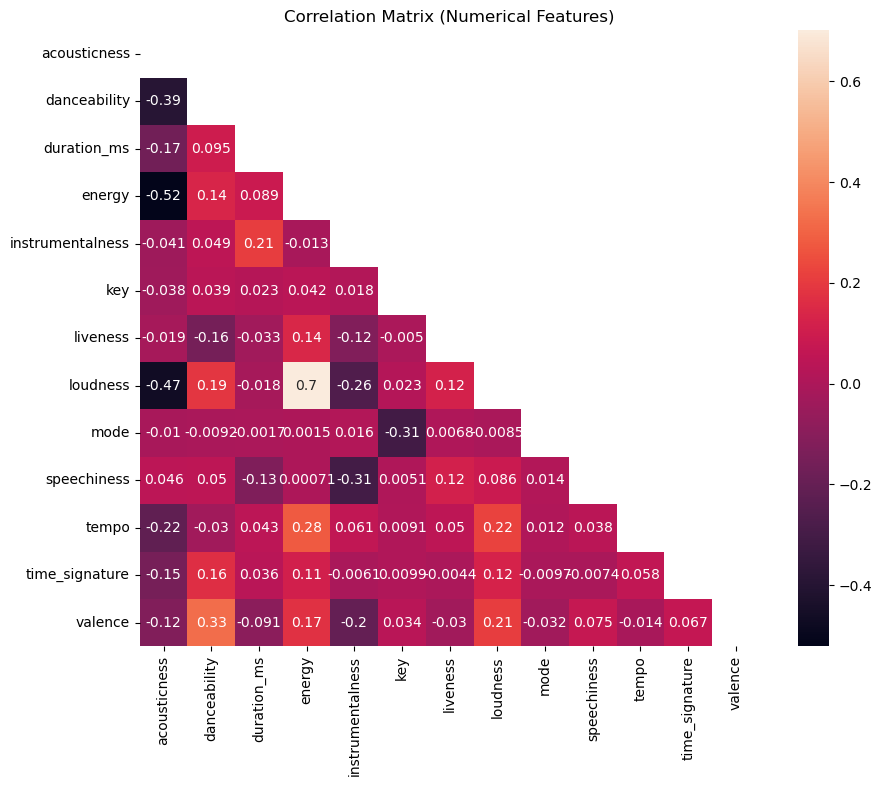

In [4]:
numerical_cols = df.select_dtypes(include=[np.number])

corr_matrix = numerical_cols.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, mask=mask)
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

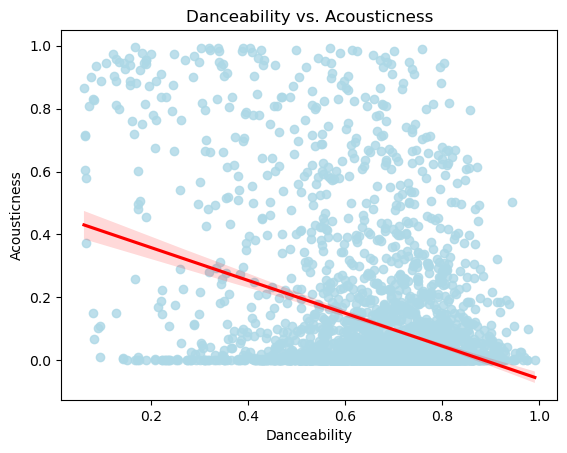

In [5]:
sns.regplot(x='danceability', y='acousticness', data=merged_df, 
            scatter_kws={'color': 'lightblue'}, line_kws={'color': 'red'})
plt.title('Danceability vs. Acousticness')
plt.xlabel('Danceability')
plt.ylabel('Acousticness')
plt.show()

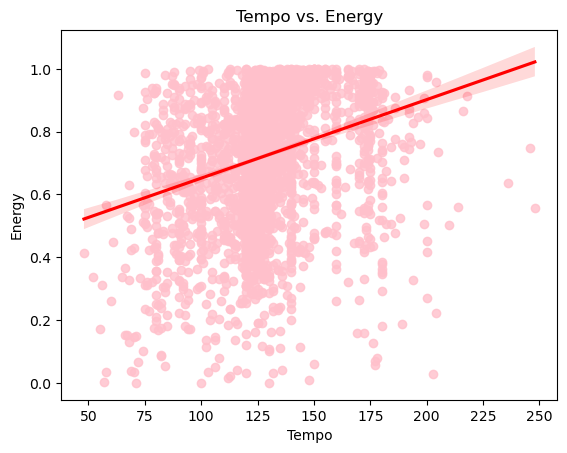

In [6]:
sns.regplot(x='tempo', y='energy', data=merged_df, 
            scatter_kws={'color': 'pink'}, line_kws={'color': 'red'})
plt.title('Tempo vs. Energy')
plt.xlabel('Tempo')
plt.ylabel('Energy')
plt.show()

In [ ]:
# WEB SCRAPER

# Read audio features
df = pd.read_csv("/Users/briansun/Downloads/audio_features.csv")

import selenium
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from datetime import datetime
import random
from seleniumwire import webdriver
from selenium_authenticated_proxy import SeleniumAuthenticatedProxy
from selenium.webdriver.chrome.service import Service
import requests
import csv
from selenium.webdriver.common.by import By
from concurrent.futures import ThreadPoolExecutor

# Path to the oculus csvs
file_path = '/Users/briansun/Downloads/ggproxies.csv' 

# List to store the combined strings
combined_list = []

# Read the oculusproxies csv to list of proxies
with open(file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        # Combine the first four columns with ':'
        if len(row) >= 4:  # Ensure there are at least four columns
            combined_string = f"{row[0]}:{row[1]}@{row[2]}:{row[3]}"
            combined_list.append(combined_string)

#pop header
combined_list.pop(0)
start_time = datetime.now()
#lookup function
def isrclookup(code):
    #random select proxy 
    rand_prox=random.choice(combined_list)
    combined_list.remove(rand_prox)
    proxy = 'http://'+rand_prox
    print(proxy)
    options={
    'proxy': {
        'https': proxy
    }
    }

    chrome_options = Options()
    #chrome_options.add_argument("--headless=new")  # Run in headless mode (no browser UI)
    proxy_helper = SeleniumAuthenticatedProxy(proxy_url=proxy)
    proxy_helper.enrich_chrome_options(chrome_options)
    service = Service(executable_path='/Users/briansun/Downloads/chromedriver-mac-arm64/chromedriver')
    chrome_options.add_argument("--incognito")
    chrome_options.add_experimental_option(
        "prefs", {
            # block image loading
            "profile.managed_default_content_settings.images": 2,
        }
    )
    chrome_options.add_experimental_option("excludeSwitches", ["enable-automation"]) 
    chrome_options.add_argument("--disable-blink-features=AutomationControlled") 
    chrome_options.add_experimental_option("useAutomationExtension", False) 
    driver = webdriver.Chrome( seleniumwire_options=options,service=service,options=chrome_options)
    driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})") 
    print('looking for: '+code)
    url = "https://isrc.soundexchange.com/?tab=%22code%22&isrcCode=%22"+code+"%22"

    try:
# print the HTML of the target webpage
        #print(driver.page_source)
        driver.get(url)
        try:
            print('waiting')
            page_title = driver.title
            print(f"Page title: {page_title}")

            if page_title == "ISRC Search":
                gorb=True
                print('Page Loaded')
            else:
                gorb=False
                print('Loading Failed')
                combined_list.append(rand_prox)
                return(['None','None',code,'TWEAKED'])
            WebDriverWait(driver, 60).until(EC.any_of(EC.visibility_of_element_located((By.TAG_NAME, "table")) , EC.presence_of_element_located((By.XPATH, "//h5[@class='sx-results' and text()='No results found']")) ))
            #WebDriverWait(driver, 6).until(
            #EC.visibility_of_element_located((By.TAG_NAME, "table")) or EC.presence_of_element_located((By.CSS_SELECTOR, "div.table-results[style="display: none;']")))
    # Locate the table element using a CSS selector or XPath
        except Exception as e:
            print('DISPLAY FAILED')
            end_time = datetime.now()
            elapsed_time = end_time - start_time
            print(f'not found{elapsed_time}')
            combined_list.append(rand_prox)
            return(['None','None',code,'FREAKED'])
        print('DISPLAY LOADED')

        table=driver.find_element(By.TAG_NAME, "table")


        #table = driver.find_element(By.TAG_NAME, "table")  # Adjust if you need a more specific selector
        end_time = datetime.now()
        elapsed_time = end_time - start_time
        print(f'Timeout:{elapsed_time}')
        #print(table)
    
    # Optionally, parse and display table content
        rows = table.find_elements(By.TAG_NAME, "tr")
        for row in rows:
            cells = row.find_elements(By.TAG_NAME, "td")
            if cells:
                print('ID FOUND')
                print([cell.text.strip() for cell in cells][6])
                res=([[cell.text.strip() for cell in cells][1],[cell.text.strip() for cell in cells][2],[cell.text.strip() for cell in cells][6],gorb]) 
                combined_list.append(rand_prox)
                return res
        print('NO RESULT')
        combined_list.append(rand_prox)
        return(['None','None',code,gorb])
    except Exception as e:
        print('No connect failed')
        return(['None','None',code,'NETDOWN'])
    finally:
    # Close the browser
        driver.quit()


random_rows = df.sample(n=6)  # `n=10` specifies the number of random rows
print(random_rows)


url_chunks = [random_rows["isrc"][i:i+6].tolist() for i in range(0, len(random_rows), 6)]
print(url_chunks)
all_results=[]
exe_time = datetime.now()
for chunk in url_chunks:
    with ThreadPoolExecutor(max_workers=len(chunk)) as executor:
        results = list(executor.map(isrclookup, chunk)) 
        all_results.extend(results)  # Add to all_results
exed_time = datetime.now()
elapseds_time = exed_time - exe_time
print(elapseds_time)
# Print out all results
for result in all_results:
    print(result)


with open('sfxoutside.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(all_results) 

In [7]:
# CONTENT BASED RECOMMENDER
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
import pandas as pd

features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'liveness']
scaler = StandardScaler()

valid_data = merged_df.dropna(subset=['title', 'artist'])
data_scaled = scaler.fit_transform(valid_data[features])

# Function to Compute Recommendations Based on Title
def recommend_by_title_sigmoid(song_title, data_scaled, valid_data, top_n=10):

    if song_title not in valid_data['title'].values:
        return f"Song title '{song_title}' not found in the dataset."

    idx = valid_data[valid_data['title'] == song_title].index[0]

    similarity_scores = sigmoid_kernel(data_scaled[idx:idx+1], data_scaled).flatten()

    sim_scores = list(enumerate(similarity_scores))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    recommended_indices = [score[0] for score in sim_scores]

    recommended_data = valid_data.iloc[recommended_indices]
    similarity_values = [score[1] for score in sim_scores]

    # Create a DataFrame for recommendations
    recommendations_df = pd.DataFrame({
        "Title": recommended_data['title'].values,
        "Artist": recommended_data['artist'].values,
        "ISRC": recommended_data['isrc'].values,
        "Danceability": recommended_data['danceability'].values,
        "Energy": recommended_data['energy'].values,
        "Valence": recommended_data['valence'].values,
        "Tempo": recommended_data['tempo'].values,
        "Acousticness": recommended_data['acousticness'].values,
        "Liveness": recommended_data['liveness'].values,
        "Similarity Score": similarity_values,
    })

    return recommendations_df

# Test the Function
song_title = "Dream of a Machine"  
recommendations = recommend_by_title_sigmoid(song_title, data_scaled, valid_data, top_n=10)

# Display Recommendations
if isinstance(recommendations, pd.DataFrame):
    print(f"Recommendations based on the song: {song_title}")
    print(tabulate(recommendations, headers='keys', tablefmt='grid'))
else:
    print(recommendations)  # Error message


Recommendations based on the song: Dream of a Machine
+----+------------------------------------------+----------------------------+--------------+----------------+----------+-----------+---------+----------------+------------+--------------------+
|    | Title                                    | Artist                     | ISRC         |   Danceability |   Energy |   Valence |   Tempo |   Acousticness |   Liveness |   Similarity Score |
+====+==========================================+============================+==============+================+==========+===========+=========+================+============+====================+
|  0 | I Got It Made (Re-Recorded / Remastered) | Various Artists            | USA370956824 |          0.666 |    0.751 |    0.85   |     190 |       0.0156   |     0.0999 |           0.907972 |
+----+------------------------------------------+----------------------------+--------------+----------------+----------+-----------+---------+----------------+------

In [8]:
# MATRIX FACTORIZATION RECOMMENDER

from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.preprocessing import StandardScaler
from implicit.als import AlternatingLeastSquares
from implicit.nearest_neighbours import bm25_weight
from scipy.sparse import coo_matrix
import pandas as pd
import numpy as np
import threadpoolctl
from tabulate import tabulate

threadpoolctl.threadpool_limits(1, "blas")

# Prepare User-Item Matrix
def prepare_user_item_matrix(data, top_n_users=100):
   
    data = data.dropna(subset=["title"])
    data['user_id'] = np.random.randint(0, top_n_users, len(data))
    data['play_count'] = np.random.randint(1, 50, len(data))

    user_ids, title_ids = data['user_id'], data['title'].factorize()[0]
    interaction_matrix = coo_matrix((data['play_count'], (user_ids, title_ids)))
    return interaction_matrix, data


# Train ALS Model
def train_als_model(interaction_matrix, factors=50, regularization=0.1, iterations=15):
   
    # Normalize interaction matrix using BM25 weighting
    interaction_matrix = bm25_weight(interaction_matrix, K1=100, B=0.8).tocsr()

    model = AlternatingLeastSquares(factors=factors, regularization=regularization, iterations=iterations)
    model.fit(interaction_matrix)

    return model, model.user_factors, model.item_factors


# Matrix Multiplication for Recommendations
def recommend_with_matrix_multiplication(user_id, user_factors, item_factors, data, top_n=10):

    scores = np.dot(user_factors[user_id], item_factors.T)

    top_indices = np.argsort(scores)[::-1][:top_n]
    top_scores = scores[top_indices]

    title_mapping = data['title'].factorize()[1]
    recommendations = pd.DataFrame({
        "Title": title_mapping[top_indices],
        "Score": top_scores
    })

    return recommendations


# Display Recommendations
def display_recommendations(recommendations):
    """
    Display recommendations in a formatted table.

    Parameters:
        recommendations (pd.DataFrame): Recommendations DataFrame.
    """
    print(tabulate(recommendations, headers='keys', tablefmt='grid'))


# Main Execution
if __name__ == "__main__":
    # Load your dataset

    # Prepare interaction matrix
    interaction_matrix, processed_data = prepare_user_item_matrix(merged_df)

    # Train ALS model
    als_model, user_factors, item_factors = train_als_model(interaction_matrix)

    # Generate recommendations for a test user
    test_user_id = 83  # Example user ID
    recommendations = recommend_with_matrix_multiplication(
        user_id=test_user_id,
        user_factors=user_factors,
        item_factors=item_factors,
        data=processed_data,
        top_n=10
    )

    # Display recommendations
    display_recommendations(recommendations)

  0%|          | 0/15 [00:00<?, ?it/s]

+----+--------------------------------+----------+
|    | Title                          |    Score |
+====+================================+==========+
|  0 | Remember                       | 0.993934 |
+----+--------------------------------+----------+
|  1 | Logman's Beak                  | 0.992078 |
+----+--------------------------------+----------+
|  2 | Wrong Side Up                  | 0.991583 |
+----+--------------------------------+----------+
|  3 | Up in Smoke                    | 0.991453 |
+----+--------------------------------+----------+
|  4 | Let You Go (feat. Yves Paquet) | 0.990825 |
+----+--------------------------------+----------+
|  5 | The Day I Lost Everything      | 0.990816 |
+----+--------------------------------+----------+
|  6 | Wisdom of the Universe         | 0.990644 |
+----+--------------------------------+----------+
|  7 | Stay in Love                   | 0.990468 |
+----+--------------------------------+----------+
|  8 | Bormaz - (maxi Version) 